In [1]:
 # The merger rate of the PBH binaries without DM halos assuming that t_merge holds for vaccum only.
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.



import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3


# Merger rate of  PBH binaries without and with halos for PBHs mass range of M_min M☉-100 M☉ .

def merger_rate(m_1, m_2, Δ_1, Δ_2, f, DM_halos_presence):
    
    def f_(m):
        return f*P(m)

    def f_b(m_1, m_2):
        return  f_(m_1) + f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
        return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, np.inf)             # Taking limits of the PBH mass from m_min M☉ to 100 M☉ instead of 
                                             # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    
    X = np.geomspace(1e-5, 1e5, 1000000) 
    
    
    if DM_halos_presence == 'False':
        
        # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
        
        
        k = 22.3819
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

        def B_nohalo(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

        
        
        def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
            return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
            
       
        def integrand_nohalo(m_1,m_2,Δ_1,Δ_2, X):
            return (1/(7 * t_m))  * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 
        
        
        return (1/2) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand_nohalo(m_1,m_2,Δ_1,Δ_2, X),X)) 
    
        
    else:

       
        def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
            return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

        def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
            return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


        def ρ_bar(m):
            return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

        def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
            return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


        def M(m, m_1, m_2, Δ_1, Δ_2, X):
            return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))

        

        def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
            return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


        #Schwarzchild Radius of the PBH.
        def r_s(m): 
            return ((2*G*m)/(c**2)) 


        #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
        def r_ta(m): 
            return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


        # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
        def E_b(m): 
            return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



        def a_initial(m_1, m_2, Δ_1, Δ_2, X):
            return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

        def beta(m_1,m_2,Δ_1, Δ_2, X):
            return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


        k = 22.3387
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

        def B_halo(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

        
        
        def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
            return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))
        
        
        
        def integrand_halo(m_1,m_2,Δ_1,Δ_2, X):
            return  (1/(7 * t_m)) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 
    

        return (1/2) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand_halo(m_1,m_2,Δ_1,Δ_2, X),X)) 
    

In [2]:
m_1 = 6   #in units of M☉
m_2 = 8    #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(10)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print("Δ_1 =", Δ_1_list)

m_1 = [6, 8, 11, 15, 19, 26, 34, 45, 60, 80] M☉
Δ_1 = [ 1.73205081  2.30940108  3.07920144  4.10560191  5.47413589  7.29884785
  9.73179713 12.97572951 17.30097268 23.06796357]


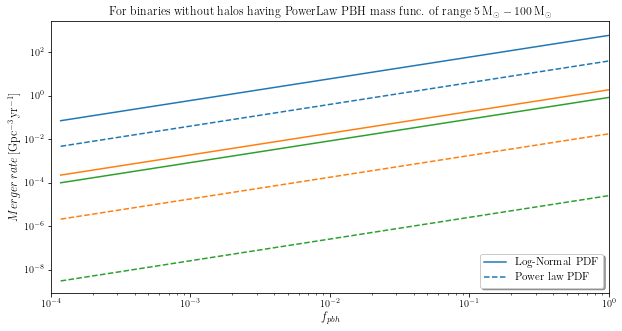

In [3]:
# Merger rate vs f for the mass range of 5 M☉ - 100 M☉ witm m_min = 5 M☉. 

m_1 = [m_1_list[0],  m_1_list[8], m_1_list[-1]]
Δ_1 = [Δ_1_list[0], Δ_1_list[8], Δ_1_list[-1]]
m_2 = [m_2_list[0],  m_2_list[8], m_2_list[-1]]
Δ_2 = [Δ_2_list[0],  Δ_2_list[8], Δ_2_list[-1]]

f = np.geomspace(1e-4, 1, 1000000)
f_pbh = (f/0.85)

color = ['C0', 'C1', 'C2', 'C3']

fig,ax = plt.subplots(figsize=(10, 5))


for i, (m_1, m_2, Δ_1, Δ_2, color) in enumerate(zip(m_1, m_2, Δ_1, Δ_2, color)):
    
    m_min = 5    #in units of M☉. 
    
    def P(m):      #Powerlaw PBH mass distribution
        α = 1.6
        M = 5    #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))
    ax.loglog(f_pbh, merger_rate( m_1 ,m_2, Δ_1, Δ_2, f, DM_halos_presence = 'False'), color = color)
    
    def P(m):      #Log-Normal PBH mass Distribution
        σ = 0.6
        m_c = 15   #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
        return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

    ax.loglog(f_pbh, merger_rate( m_1 ,m_2, Δ_1, Δ_2, f, DM_halos_presence = 'False'), color = color, linestyle ='--')
    

plt.rc('lines',linewidth=1.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlim(1e-4, 1)        



plt.xlabel('$f_{pbh}$',fontsize=12,labelpad=3)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$',fontsize=12)
plt.title('Merger rate')
# plt.legend(["$ m_{1} , m_{2} = 7\, M_{\odot} $","$m_{1} , m_{2} = 20\, M_{\odot}$","$m_{1} , m_{2} = 53\,M_{\odot}$",
           #  "$m_{1} , m_{2} = 87\,M_{\odot}$"],loc='lower right', prop={'size':10})

plt.legend(["Log-Normal PDF","Power law PDF"], prop = {'size':11}, facecolor = 'white',loc='lower right',shadow = True,fontsize=33)
    
plt.title('For binaries without halos having PowerLaw PBH mass func. of range $5\, \mathrm{M_{\odot}} - 100\, \mathrm{M_{\odot}}$')
plt.savefig('mergervsf.pdf',bbox_inches = 'tight')
plt.show()

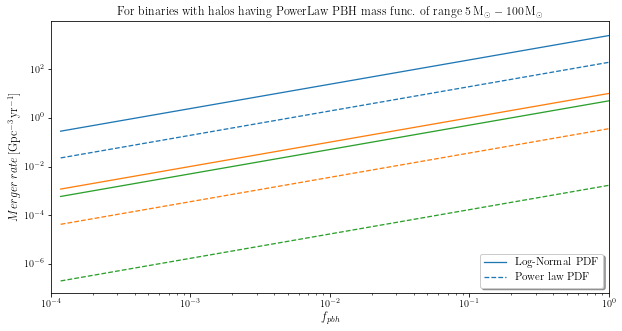

In [4]:
# Merger rate vs f for the mass range of 5 M☉ - 100 M☉ witm m_min = 5 M☉. 



m_1 = [m_1_list[0],  m_1_list[8], m_1_list[-1]]
Δ_1 = [Δ_1_list[0], Δ_1_list[8], Δ_1_list[-1]]
m_2 = [m_2_list[0],  m_2_list[8], m_2_list[-1]]
Δ_2 = [Δ_2_list[0],  Δ_2_list[8], Δ_2_list[-1]]

f = np.geomspace(1e-4, 1, 1000000)
f_pbh = (f/0.85)

color = ['C0', 'C1', 'C2', 'C3']

fig,ax = plt.subplots(figsize=(10, 5))


for i, (m_1, m_2, Δ_1, Δ_2, color) in enumerate(zip(m_1, m_2, Δ_1, Δ_2, color)):
    
    m_min = 5    #in units of M☉. 
    
    def P(m):      #Powerlaw PBH mass distribution
        α = 1.6
        M = 5    #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))
    ax.loglog(f_pbh, merger_rate( m_1 ,m_2, Δ_1, Δ_2, f, DM_halos_presence = 'True'), color = color)
    
    def P(m):      #Log-Normal PBH mass Distribution
        σ = 0.6
        m_c = 15   #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
        return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

    ax.loglog(f_pbh, merger_rate( m_1 ,m_2, Δ_1, Δ_2, f, DM_halos_presence = 'True'), color = color, linestyle ='--')
    

plt.rc('lines',linewidth=1.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlim(1e-4, 1)        



plt.xlabel('$f_{pbh}$',fontsize=12,labelpad=3)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$',fontsize=12)
plt.title('Merger rate')
# plt.legend(["$ m_{1} , m_{2} = 7\, M_{\odot} $","$m_{1} , m_{2} = 20\, M_{\odot}$","$m_{1} , m_{2} = 53\,M_{\odot}$",
           #  "$m_{1} , m_{2} = 87\,M_{\odot}$"],loc='lower right', prop={'size':10})

plt.legend(["Log-Normal PDF","Power law PDF"], prop = {'size':11}, facecolor = 'white',loc='lower right',shadow = True,fontsize=33)
    
plt.title('For binaries with halos having PowerLaw PBH mass func. of range $5\, \mathrm{M_{\odot}} - 100\, \mathrm{M_{\odot}}$')
plt.savefig('halomergervsf.pdf',bbox_inches = 'tight')
plt.show()

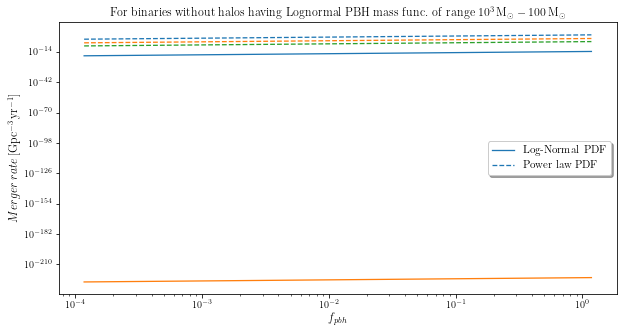

In [5]:
# Merger rate vs f for the mass range of 1e-3 M☉ - 100 M☉ witm m_min = 1e-3 M☉. 



m_1 = [m_1_list[0],  m_1_list[8], m_1_list[-1]]
Δ_1 = [Δ_1_list[0], Δ_1_list[8], Δ_1_list[-1]]
m_2 = [m_2_list[0],  m_2_list[8], m_2_list[-1]]
Δ_2 = [Δ_2_list[0],  Δ_2_list[8], Δ_2_list[-1]]

f = np.geomspace(1e-4, 1, 1000000)
f_pbh = (f/0.85)

color = ['C0', 'C1', 'C2', 'C3']

fig,ax = plt.subplots(figsize=(10, 5))


for i, (m_1, m_2, Δ_1, Δ_2, color) in enumerate(zip(m_1, m_2, Δ_1, Δ_2, color)):
    
    m_min = 1e-3    #in units of M☉. 
    
    def P(m):      #Powerlaw PBH mass distribution
        α = 1.6
        M = 1e-3    #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))
    
    ax.loglog(f_pbh, merger_rate(m_1 , m_2, Δ_1, Δ_2, f, DM_halos_presence = 'False'), color = color)
    
    def P(m):      #Log-Normal PBH mass Distribution
        σ = 0.6
        m_c = 15   #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
        return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

    ax.loglog(f_pbh, merger_rate( m_1 ,m_2, Δ_1, Δ_2, f, DM_halos_presence = 'False'), color = color, linestyle ='--')
    

plt.rc('lines',linewidth=1.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

        



plt.xlabel('$f_{pbh}$',fontsize=12,labelpad=3)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$',fontsize=12)
plt.title('Merger rate')
# plt.legend(["$ m_{1} , m_{2} = 7\, M_{\odot} $","$m_{1} , m_{2} = 20\, M_{\odot}$","$m_{1} , m_{2} = 53\,M_{\odot}$",
           #  "$m_{1} , m_{2} = 87\,M_{\odot}$"],loc='lower right', prop={'size':10})

plt.legend(["Log-Normal PDF","Power law PDF"], prop = {'size':11}, facecolor = 'white',loc = 'center right',shadow = True,fontsize=33)
    
plt.title('For binaries without halos having Lognormal PBH mass func. of range $10^{3}\, \mathrm{M_{\odot}} - 100\, \mathrm{M_{\odot}}$')
plt.savefig('Lmergervsf.pdf',bbox_inches = 'tight')
plt.show()

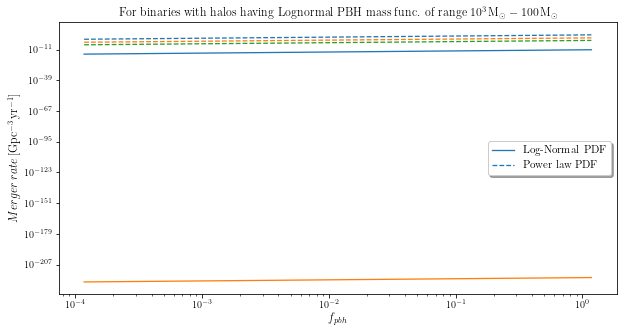

In [6]:
# Merger rate vs f for the mass range of 1e-3 M☉ - 100 M☉ witm m_min = 1e-3 M☉. 

m_1 = [m_1_list[0],  m_1_list[8], m_1_list[-1]]
Δ_1 = [Δ_1_list[0], Δ_1_list[8], Δ_1_list[-1]]
m_2 = [m_2_list[0],  m_2_list[8], m_2_list[-1]]
Δ_2 = [Δ_2_list[0],  Δ_2_list[8], Δ_2_list[-1]]

f = np.geomspace(1e-4, 1, 1000000)
f_pbh = (f/0.85)

color = ['C0', 'C1', 'C2', 'C3']

fig,ax = plt.subplots(figsize=(10, 5))


for i, (m_1, m_2, Δ_1, Δ_2, color) in enumerate(zip(m_1, m_2, Δ_1, Δ_2, color)):
    
    m_min = 1e-3    #in units of M☉. 
    
    def P(m):      #Powerlaw PBH mass distribution
        α = 1.6
        M = 1e-3    #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))
    
    ax.loglog(f_pbh, merger_rate(m_1 , m_2, Δ_1, Δ_2, f, DM_halos_presence = 'True'), color = color)
    
    def P(m):      #Log-Normal PBH mass Distribution
        σ = 0.6
        m_c = 15   #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
        return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

    ax.loglog(f_pbh, merger_rate( m_1 ,m_2, Δ_1, Δ_2, f, DM_halos_presence = 'True'), color = color, linestyle ='--')
    

plt.rc('lines',linewidth=1.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

        



plt.xlabel('$f_{pbh}$',fontsize=12,labelpad=3)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$',fontsize=12)
plt.title('Merger rate')
# plt.legend(["$ m_{1} , m_{2} = 7\, M_{\odot} $","$m_{1} , m_{2} = 20\, M_{\odot}$","$m_{1} , m_{2} = 53\,M_{\odot}$",
           #  "$m_{1} , m_{2} = 87\,M_{\odot}$"],loc='lower right', prop={'size':10})

plt.legend(["Log-Normal PDF","Power law PDF"], prop = {'size':11}, facecolor = 'white',loc = 'center right',shadow = True,fontsize=33)
    
plt.title('For binaries with halos having Lognormal PBH mass func. of range $10^{3}\, \mathrm{M_{\odot}} - 100\, \mathrm{M_{\odot}}$')
plt.savefig('Lhalomergervsf.pdf', bbox_inches = 'tight')
plt.show()